In [1]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("itachi9604/disease-symptom-description-dataset")

print("Path to dataset files:", path)

Using Colab cache for faster access to the 'disease-symptom-description-dataset' dataset.
Path to dataset files: /kaggle/input/disease-symptom-description-dataset


In [2]:
import os

path = "/kaggle/input/disease-symptom-description-dataset"

# List files in the dataset folder
os.listdir(path)

['symptom_Description.csv',
 'Symptom-severity.csv',
 'symptom_precaution.csv',
 'dataset.csv']

In [3]:
!cp -r /kaggle/input/disease-symptom-description-dataset /content/kaggle_imageclass

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from collections import defaultdict
import re
import warnings
warnings.filterwarnings('ignore')

# STEP 1: DATA LOADING & EXPLORATION

In [5]:
dataset = pd.read_csv('/content/kaggle_imageclass/dataset.csv')
symptom_severity = pd.read_csv('/content/kaggle_imageclass/Symptom-severity.csv')
symptom_description = pd.read_csv('/content/kaggle_imageclass/symptom_Description.csv')
symptom_precaution = pd.read_csv('/content/kaggle_imageclass/symptom_precaution.csv')


In [6]:
 #Display basic information
print("\n" + "="*60)
print("DATASET 1: Disease-Symptoms Mapping (dataset.csv)")
print("="*60)
print(f"Shape: {dataset.shape}")
print(f"Columns: {dataset.columns.tolist()}")
print("\nFirst 5 rows:")
print(dataset.head())
print("\nMissing values:")
print(dataset.isnull().sum())
print(f"\nUnique diseases: {dataset['Disease'].nunique()}")


DATASET 1: Disease-Symptoms Mapping (dataset.csv)
Shape: (4920, 18)
Columns: ['Disease', 'Symptom_1', 'Symptom_2', 'Symptom_3', 'Symptom_4', 'Symptom_5', 'Symptom_6', 'Symptom_7', 'Symptom_8', 'Symptom_9', 'Symptom_10', 'Symptom_11', 'Symptom_12', 'Symptom_13', 'Symptom_14', 'Symptom_15', 'Symptom_16', 'Symptom_17']

First 5 rows:
            Disease   Symptom_1              Symptom_2              Symptom_3  \
0  Fungal infection     itching              skin_rash   nodal_skin_eruptions   
1  Fungal infection   skin_rash   nodal_skin_eruptions    dischromic _patches   
2  Fungal infection     itching   nodal_skin_eruptions    dischromic _patches   
3  Fungal infection     itching              skin_rash    dischromic _patches   
4  Fungal infection     itching              skin_rash   nodal_skin_eruptions   

              Symptom_4 Symptom_5 Symptom_6 Symptom_7 Symptom_8 Symptom_9  \
0   dischromic _patches       NaN       NaN       NaN       NaN       NaN   
1                   NaN  

In [7]:
print("\n" + "="*60)
print("DATASET 2: Symptom Severity Weights (Symptom-severity.csv)")
print("="*60)
print(f"Shape: {symptom_severity.shape}")
print(f"Columns: {symptom_severity.columns.tolist()}")
print("\nFirst 5 rows:")
print(symptom_severity.head())
print(f"\nUnique symptoms: {len(symptom_severity)}")
print("\nWeight distribution:")
print(symptom_severity['weight'].describe())


DATASET 2: Symptom Severity Weights (Symptom-severity.csv)
Shape: (133, 2)
Columns: ['Symptom', 'weight']

First 5 rows:
                Symptom  weight
0               itching       1
1             skin_rash       3
2  nodal_skin_eruptions       4
3   continuous_sneezing       4
4             shivering       5

Unique symptoms: 133

Weight distribution:
count    133.000000
mean       4.225564
std        1.323543
min        1.000000
25%        3.000000
50%        4.000000
75%        5.000000
max        7.000000
Name: weight, dtype: float64


In [8]:
print("\n" + "="*60)
print("DATASET 3: Disease Descriptions (symptom_Description.csv)")
print("="*60)
print(f"Shape: {symptom_description.shape}")
print(f"Columns: {symptom_description.columns.tolist()}")
print("\nFirst 3 rows:")
print(symptom_description.head(3))


DATASET 3: Disease Descriptions (symptom_Description.csv)
Shape: (41, 2)
Columns: ['Disease', 'Description']

First 3 rows:
         Disease                                        Description
0  Drug Reaction  An adverse drug reaction (ADR) is an injury ca...
1        Malaria  An infectious disease caused by protozoan para...
2        Allergy  An allergy is an immune system response to a f...


In [9]:
print("\n" + "="*60)
print("DATASET 4: Disease Precautions (symptom_precaution.csv)")
print("="*60)
print(f"Shape: {symptom_precaution.shape}")
print(f"Columns: {symptom_precaution.columns.tolist()}")
print("\nFirst 3 rows:")
print(symptom_precaution.head(3))


DATASET 4: Disease Precautions (symptom_precaution.csv)
Shape: (41, 5)
Columns: ['Disease', 'Precaution_1', 'Precaution_2', 'Precaution_3', 'Precaution_4']

First 3 rows:
         Disease              Precaution_1              Precaution_2  \
0  Drug Reaction           stop irritation  consult nearest hospital   
1        Malaria  Consult nearest hospital           avoid oily food   
2        Allergy            apply calamine   cover area with bandage   

         Precaution_3                 Precaution_4  
0    stop taking drug                    follow up  
1  avoid non veg food           keep mosquitos out  
2                 NaN  use ice to compress itching  


In [10]:
missing_counts = dataset.isnull().sum()
symptom_cols = [col for col in dataset.columns if 'Symptom' in col]

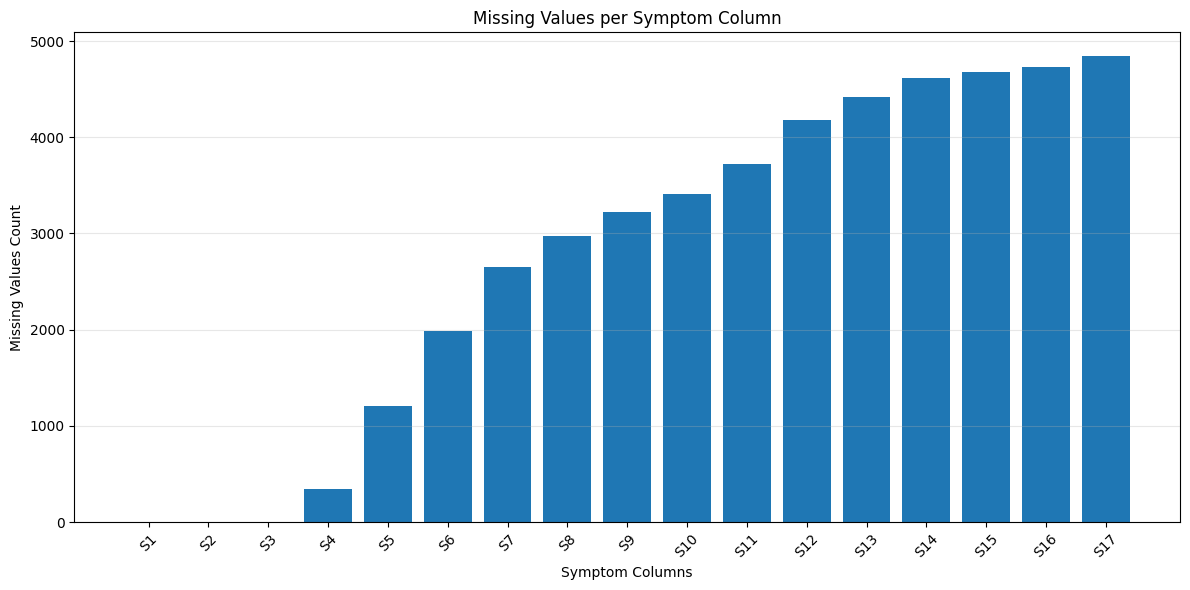

In [11]:
plt.figure(figsize=(12, 6))
plt.bar(range(len(symptom_cols)), [missing_counts[col] for col in symptom_cols])
plt.xlabel('Symptom Columns')
plt.ylabel('Missing Values Count')
plt.title('Missing Values per Symptom Column')
plt.xticks(range(len(symptom_cols)), [f'S{i+1}' for i in range(len(symptom_cols))], rotation=45)
plt.grid(axis='y', alpha=0.3)
plt.tight_layout()
plt.show()

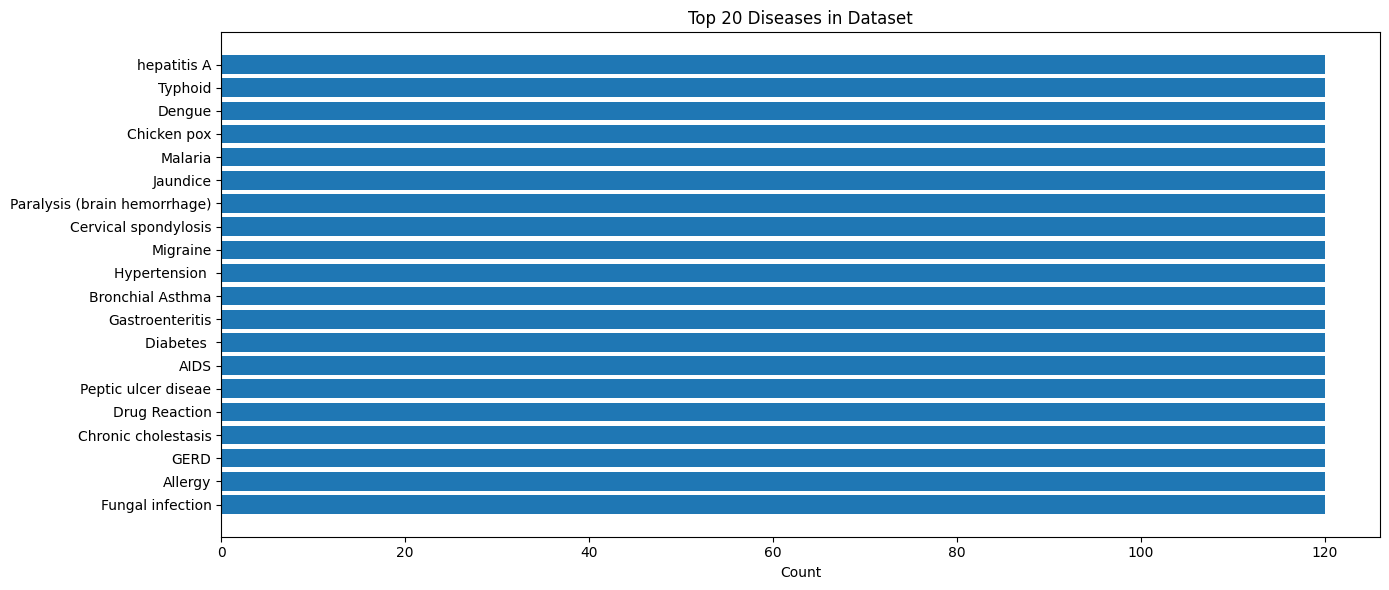

In [12]:
# Visualization 2: Disease distribution
plt.figure(figsize=(14, 6))
disease_counts = dataset['Disease'].value_counts().head(20)
plt.barh(range(len(disease_counts)), disease_counts.values)
plt.yticks(range(len(disease_counts)), disease_counts.index)
plt.xlabel('Count')
plt.title('Top 20 Diseases in Dataset')
plt.tight_layout()
plt.show()

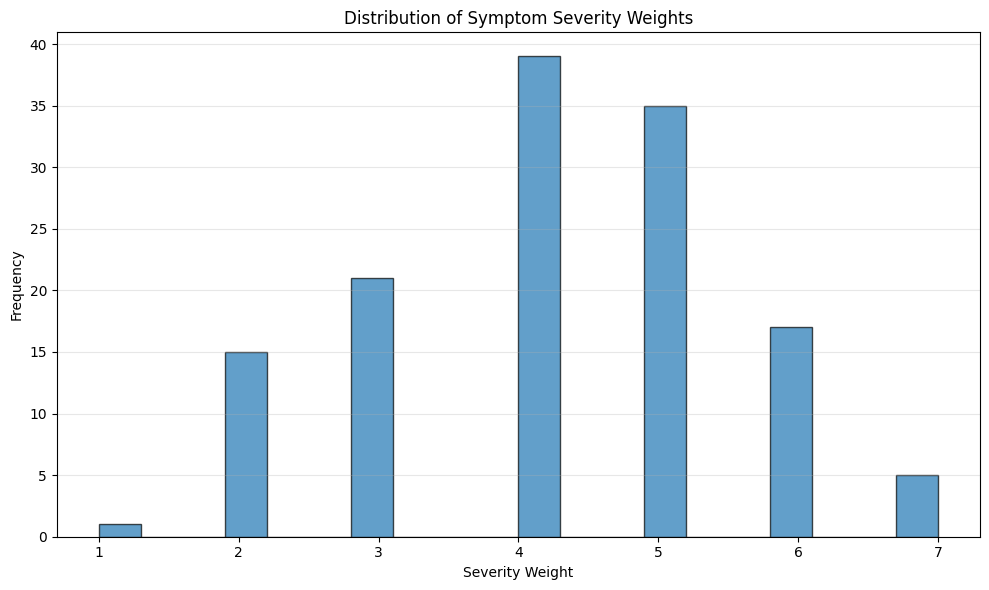

In [13]:
# Visualization 3: Symptom severity distribution
plt.figure(figsize=(10, 6))
plt.hist(symptom_severity['weight'], bins=20, edgecolor='black', alpha=0.7)
plt.xlabel('Severity Weight')
plt.ylabel('Frequency')
plt.title('Distribution of Symptom Severity Weights')
plt.grid(axis='y', alpha=0.3)
plt.tight_layout()
plt.show()

# STEP 2: DATA PREPROCESSING

In [14]:
disease_symptoms_dict = {}

for idx, row in dataset.iterrows():
    disease = row['Disease']
    # Get all symptom columns and remove NaN values
    symptoms = []
    for col in symptom_cols:
        symptom = row[col]
        if pd.notna(symptom):
            # Clean symptom name (remove underscores, lowercase)
            symptom = str(symptom).strip().replace('_', ' ').lower()
            symptoms.append(symptom)

    disease_symptoms_dict[disease] = symptoms

print(f"✓ Processed {len(disease_symptoms_dict)} diseases")
print(f"\nExample - Malaria symptoms: {disease_symptoms_dict.get('Malaria', [])}")
print(f"Example - Allergy symptoms: {disease_symptoms_dict.get('Allergy', [])}")

✓ Processed 41 diseases

Example - Malaria symptoms: ['chills', 'vomiting', 'high fever', 'sweating', 'headache', 'nausea', 'diarrhoea', 'muscle pain']
Example - Allergy symptoms: ['continuous sneezing', 'shivering', 'chills', 'watering from eyes']


In [15]:
# Calculate average symptoms per disease
avg_symptoms = np.mean([len(symptoms) for symptoms in disease_symptoms_dict.values()])
print(f"\nAverage symptoms per disease: {avg_symptoms:.2f}")


Average symptoms per disease: 7.83


In [16]:
symptom_severity_dict = {}

for idx, row in symptom_severity.iterrows():
    symptom = str(row['Symptom']).strip().replace('_', ' ').lower()
    weight = row['weight']
    symptom_severity_dict[symptom] = weight

print(f"✓ Processed {len(symptom_severity_dict)} symptom severity weights")
print(f"\nExample weights:")
print(f"  - itching: {symptom_severity_dict.get('itching', 'N/A')}")
print(f"  - fever: {symptom_severity_dict.get('high fever', 'N/A')}")
print(f"  - headache: {symptom_severity_dict.get('headache', 'N/A')}")

✓ Processed 132 symptom severity weights

Example weights:
  - itching: 1
  - fever: 7
  - headache: 3


In [17]:
print("\n[2.3] Merging disease information...")

disease_info_dict = {}

for disease in disease_symptoms_dict.keys():
    info = {
        'symptoms': disease_symptoms_dict[disease],
        'description': '',
        'precautions': []
    }

    # Get description
    desc_row = symptom_description[symptom_description['Disease'] == disease]
    if not desc_row.empty:
        info['description'] = desc_row.iloc[0]['Description']

    # Get precautions
    prec_row = symptom_precaution[symptom_precaution['Disease'] == disease]
    if not prec_row.empty:
        precautions = []
        for i in range(1, 5):
            prec_col = f'Precaution_{i}'
            if prec_col in prec_row.columns:
                prec = prec_row.iloc[0][prec_col]
                if pd.notna(prec):
                    precautions.append(str(prec).strip())
        info['precautions'] = precautions

    disease_info_dict[disease] = info

print(f"✓ Merged information for {len(disease_info_dict)} diseases")
print(f"\nExample - Malaria info:")
print(f"  Symptoms: {disease_info_dict['Malaria']['symptoms'][:3]}...")
print(f"  Description: {disease_info_dict['Malaria']['description'][:80]}...")
print(f"  Precautions: {disease_info_dict['Malaria']['precautions']}")


[2.3] Merging disease information...
✓ Merged information for 41 diseases

Example - Malaria info:
  Symptoms: ['chills', 'vomiting', 'high fever']...
  Description: An infectious disease caused by protozoan parasites from the Plasmodium family t...
  Precautions: ['Consult nearest hospital', 'avoid oily food', 'avoid non veg food', 'keep mosquitos out']


In [18]:
print("\n[2.4] Creating symptom to diseases mapping...")

symptom_to_diseases = defaultdict(list)

for disease, symptoms in disease_symptoms_dict.items():
    for symptom in symptoms:
        symptom_to_diseases[symptom].append(disease)

print(f"✓ Created reverse mapping for {len(symptom_to_diseases)} unique symptoms")
print(f"\nExample - 'fever' appears in: {symptom_to_diseases.get('high fever', [])[:5]}...")


[2.4] Creating symptom to diseases mapping...
✓ Created reverse mapping for 131 unique symptoms

Example - 'fever' appears in: ['AIDS', 'Bronchial Asthma', 'Jaundice', 'Malaria', 'Chicken pox']...


In [19]:
print("\n" + "="*60)
print("PREPROCESSING SUMMARY")
print("="*60)
print(f"Total diseases: {len(disease_symptoms_dict)}")
print(f"Total unique symptoms: {len(symptom_to_diseases)}")
print(f"Symptoms with severity weights: {len(symptom_severity_dict)}")
print(f"Average symptoms per disease: {avg_symptoms:.2f}")
print(f"Max symptoms for a disease: {max(len(s) for s in disease_symptoms_dict.values())}")
print(f"Min symptoms for a disease: {min(len(s) for s in disease_symptoms_dict.values())}")


PREPROCESSING SUMMARY
Total diseases: 41
Total unique symptoms: 131
Symptoms with severity weights: 132
Average symptoms per disease: 7.83
Max symptoms for a disease: 17
Min symptoms for a disease: 4


# STEP 3: BUILD CORE FUNCTIONS

In [20]:
def extract_symptoms(user_input, known_symptoms):
    """
    Extract symptoms from user input text

    Args:
        user_input (str): User's text input
        known_symptoms (list): List of known symptoms from database

    Returns:
        list: List of matched symptoms
    """
    user_input = user_input.lower().strip()
    detected_symptoms = []

    # Check for each known symptom in user input
    for symptom in known_symptoms:
        # Create pattern for matching (handle variations)
        symptom_words = symptom.split()

        # Check if all words of symptom are in user input
        if all(word in user_input for word in symptom_words):
            detected_symptoms.append(symptom)

        # Also check for partial matches (single word symptoms)
        elif len(symptom_words) == 1 and symptom in user_input:
            detected_symptoms.append(symptom)

    return detected_symptoms

print("✓ Symptom extraction function created")

✓ Symptom extraction function created


In [21]:
def match_diseases(input_symptoms, disease_symptoms_dict, top_k=5):
    """
    Match user symptoms to diseases and calculate confidence scores

    Args:
        input_symptoms (list): List of symptoms from user
        disease_symptoms_dict (dict): Dictionary mapping diseases to symptoms
        top_k (int): Number of top matches to return

    Returns:
        list: List of tuples (disease, confidence_score, matched_symptoms)
    """
    if not input_symptoms:
        return []

    disease_scores = []

    for disease, disease_symptoms in disease_symptoms_dict.items():
        # Find common symptoms
        matched_symptoms = set(input_symptoms) & set(disease_symptoms)

        if matched_symptoms:
            # Calculate confidence score
            # Score = (matched symptoms / disease symptoms) * (matched / input symptoms)
            precision = len(matched_symptoms) / len(disease_symptoms)
            recall = len(matched_symptoms) / len(input_symptoms)

            # F1-score as confidence
            if precision + recall > 0:
                confidence = 2 * (precision * recall) / (precision + recall)
            else:
                confidence = 0

            disease_scores.append({
                'disease': disease,
                'confidence': confidence,
                'matched_symptoms': list(matched_symptoms),
                'match_count': len(matched_symptoms)
            })

    # Sort by confidence and match count
    disease_scores.sort(key=lambda x: (x['confidence'], x['match_count']), reverse=True)

    return disease_scores[:top_k]

print("✓ Disease matching function created")

✓ Disease matching function created


In [22]:
def assess_urgency(symptoms, symptom_severity_dict):
    """
    Assess urgency level based on symptom severity

    Args:
        symptoms (list): List of symptoms
        symptom_severity_dict (dict): Symptom to severity weight mapping

    Returns:
        tuple: (urgency_level, urgency_score, explanation)
    """
    if not symptoms:
        return "UNKNOWN", 0, "No symptoms provided"

    # Calculate total severity score
    total_score = 0
    symptom_count = 0

    for symptom in symptoms:
        if symptom in symptom_severity_dict:
            total_score += symptom_severity_dict[symptom]
            symptom_count += 1

    # Calculate average severity
    if symptom_count > 0:
        avg_severity = total_score / symptom_count
    else:
        avg_severity = 0

    # Determine urgency level
    if avg_severity >= 6 or total_score >= 20:
        urgency = "HIGH"
        color = "🔴"
        recommendation = "Seek immediate medical attention or visit ER"
    elif avg_severity >= 4 or total_score >= 12:
        urgency = "MODERATE"
        color = "🟡"
        recommendation = "Consult a doctor within 24 hours"
    else:
        urgency = "LOW"
        color = "🟢"
        recommendation = "Monitor symptoms and rest. Consult doctor if symptoms worsen"

    explanation = f"Average severity: {avg_severity:.1f} | Total score: {total_score}"

    return urgency, avg_severity, f"{color} {recommendation}"

print("✓ Urgency assessment function created")

✓ Urgency assessment function created


In [23]:
def perform_triage(user_input, disease_info_dict, symptom_severity_dict, symptom_to_diseases):
    """
    Main function to perform complete symptom triage

    Args:
        user_input (str): User's symptom description
        disease_info_dict (dict): Complete disease information
        symptom_severity_dict (dict): Symptom severity weights
        symptom_to_diseases (dict): Symptom to disease mapping

    Returns:
        dict: Complete triage results
    """
    # Extract symptoms
    all_symptoms = list(symptom_to_diseases.keys())
    detected_symptoms = extract_symptoms(user_input, all_symptoms)

    if not detected_symptoms:
        return {
            'status': 'error',
            'message': 'No recognizable symptoms found. Please describe your symptoms clearly.',
            'detected_symptoms': []
        }

    # Match diseases
    disease_symptoms_only = {d: info['symptoms'] for d, info in disease_info_dict.items()}
    matched_diseases = match_diseases(detected_symptoms, disease_symptoms_only, top_k=5)

    if not matched_diseases:
        return {
            'status': 'error',
            'message': 'Could not match symptoms to any known conditions.',
            'detected_symptoms': detected_symptoms
        }

    # Assess urgency
    urgency, severity_score, recommendation = assess_urgency(detected_symptoms, symptom_severity_dict)

    # Prepare results
    results = {
        'status': 'success',
        'detected_symptoms': detected_symptoms,
        'urgency': urgency,
        'severity_score': severity_score,
        'recommendation': recommendation,
        'possible_conditions': []
    }

    # Add disease details
    for disease_match in matched_diseases:
        disease_name = disease_match['disease']
        disease_details = {
            'name': disease_name,
            'confidence': disease_match['confidence'],
            'matched_symptoms': disease_match['matched_symptoms'],
            'description': disease_info_dict[disease_name]['description'],
            'precautions': disease_info_dict[disease_name]['precautions']
        }
        results['possible_conditions'].append(disease_details)

    return results

print("✓ Main triage function created")

✓ Main triage function created


# STEP 3.5: TESTING FUNCTIONS WITH SAMPLE INPUTS

In [24]:
# Test Case 1: Common cold symptoms
print("\n" + "-"*60)
print("TEST 1: Common Cold Symptoms")
print("-"*60)
test_input_1 = "I have a runny nose, continuous sneezing, and mild fever"
print(f"Input: '{test_input_1}'")

result_1 = perform_triage(test_input_1, disease_info_dict, symptom_severity_dict, symptom_to_diseases)

print(f"\nStatus: {result_1['status']}")
print(f"Detected Symptoms: {result_1.get('detected_symptoms', [])}")
if result_1['status'] == 'success':
    print(f"Urgency Level: {result_1['urgency']}")
    print(f"Recommendation: {result_1['recommendation']}")
    print(f"\nPossible Conditions:")
    for i, condition in enumerate(result_1['possible_conditions'][:3], 1):
        print(f"  {i}. {condition['name']} (Confidence: {condition['confidence']:.2%})")
        print(f"     Matched Symptoms: {condition['matched_symptoms']}")


------------------------------------------------------------
TEST 1: Common Cold Symptoms
------------------------------------------------------------
Input: 'I have a runny nose, continuous sneezing, and mild fever'

Status: success
Detected Symptoms: ['continuous sneezing', 'mild fever', 'runny nose']
Urgency Level: MODERATE
Recommendation: 🟡 Consult a doctor within 24 hours

Possible Conditions:
  1. Allergy (Confidence: 28.57%)
     Matched Symptoms: ['continuous sneezing']
  2. Common Cold (Confidence: 20.00%)
     Matched Symptoms: ['continuous sneezing', 'runny nose']
  3. Chicken pox (Confidence: 14.29%)
     Matched Symptoms: ['mild fever']


In [25]:
# Test Case 2: More serious symptoms
print("\n" + "-"*60)
print("TEST 2: More Serious Symptoms")
print("-"*60)
test_input_2 = "I have high fever, severe headache, chills, and vomiting"
print(f"Input: '{test_input_2}'")

result_2 = perform_triage(test_input_2, disease_info_dict, symptom_severity_dict, symptom_to_diseases)

print(f"\nStatus: {result_2['status']}")
print(f"Detected Symptoms: {result_2.get('detected_symptoms', [])}")
if result_2['status'] == 'success':
    print(f"Urgency Level: {result_2['urgency']}")
    print(f"Recommendation: {result_2['recommendation']}")
    print(f"\nPossible Conditions:")
    for i, condition in enumerate(result_2['possible_conditions'][:3], 1):
        print(f"  {i}. {condition['name']} (Confidence: {condition['confidence']:.2%})")
        print(f"     Precautions: {condition['precautions'][:2]}")


------------------------------------------------------------
TEST 2: More Serious Symptoms
------------------------------------------------------------
Input: 'I have high fever, severe headache, chills, and vomiting'

Status: success
Detected Symptoms: ['chills', 'vomiting', 'high fever', 'headache']
Urgency Level: MODERATE
Recommendation: 🟡 Consult a doctor within 24 hours

Possible Conditions:
  1. Malaria (Confidence: 66.67%)
     Precautions: ['Consult nearest hospital', 'avoid oily food']
  2. Typhoid (Confidence: 53.33%)
     Precautions: ['eat high calorie vegitables', 'antiboitic therapy']
  3. Paralysis (brain hemorrhage) (Confidence: 50.00%)
     Precautions: ['massage', 'eat healthy']


In [26]:
# Test Case 3: Skin condition
print("\n" + "-"*60)
print("TEST 3: Skin Condition")
print("-"*60)
test_input_3 = "I have itching and skin rash on my arms"
print(f"Input: '{test_input_3}'")

result_3 = perform_triage(test_input_3, disease_info_dict, symptom_severity_dict, symptom_to_diseases)

print(f"\nStatus: {result_3['status']}")
print(f"Detected Symptoms: {result_3.get('detected_symptoms', [])}")
if result_3['status'] == 'success':
    print(f"Urgency Level: {result_3['urgency']}")
    print(f"Recommendation: {result_3['recommendation']}")
    print(f"\nPossible Conditions:")
    for i, condition in enumerate(result_3['possible_conditions'][:3], 1):
        print(f"  {i}. {condition['name']} (Confidence: {condition['confidence']:.2%})")


------------------------------------------------------------
TEST 3: Skin Condition
------------------------------------------------------------
Input: 'I have itching and skin rash on my arms'

Status: success
Detected Symptoms: ['itching', 'skin rash']
Urgency Level: LOW
Recommendation: 🟢 Monitor symptoms and rest. Consult doctor if symptoms worsen

Possible Conditions:
  1. Fungal infection (Confidence: 66.67%)
  2. Drug Reaction (Confidence: 57.14%)
  3. Acne (Confidence: 33.33%)


In [27]:
# Test Case 4: No symptoms found
print("\n" + "-"*60)
print("TEST 4: Invalid Input")
print("-"*60)
test_input_4 = "I'm feeling unwell"
print(f"Input: '{test_input_4}'")

result_4 = perform_triage(test_input_4, disease_info_dict, symptom_severity_dict, symptom_to_diseases)

print(f"\nStatus: {result_4['status']}")
print(f"Message: {result_4.get('message', 'N/A')}")

print("\n" + "="*60)
print("✓ ALL TESTS COMPLETED SUCCESSFULLY!")
print("="*60)


------------------------------------------------------------
TEST 4: Invalid Input
------------------------------------------------------------
Input: 'I'm feeling unwell'

Status: error
Message: No recognizable symptoms found. Please describe your symptoms clearly.

✓ ALL TESTS COMPLETED SUCCESSFULLY!


In [28]:
print("\n" + "="*60)
print("SAVING PROCESSED DATA")
print("="*60)

import pickle

# Save all processed data
print("\nSaving processed dictionaries...")

with open('disease_info_dict.pkl', 'wb') as f:
    pickle.dump(disease_info_dict, f)
print("✓ Saved disease_info_dict.pkl")

with open('symptom_severity_dict.pkl', 'wb') as f:
    pickle.dump(symptom_severity_dict, f)
print("✓ Saved symptom_severity_dict.pkl")

with open('symptom_to_diseases.pkl', 'wb') as f:
    pickle.dump(dict(symptom_to_diseases), f)
print("✓ Saved symptom_to_diseases.pkl")

print("\n" + "="*60)
print("✓ STEPS 1-3 COMPLETED SUCCESSFULLY!")


SAVING PROCESSED DATA

Saving processed dictionaries...
✓ Saved disease_info_dict.pkl
✓ Saved symptom_severity_dict.pkl
✓ Saved symptom_to_diseases.pkl

✓ STEPS 1-3 COMPLETED SUCCESSFULLY!


# 4.1: CREATE COMPREHENSIVE FAQ DATABASE

In [29]:
from sentence_transformers import SentenceTransformer
import pickle

In [30]:
# Define FAQ categories and questions/answers
faq_data = []

In [31]:
# ============= CATEGORY 1: GENERAL HEALTH =============
general_health_faqs = [
    {
        "category": "General Health",
        "question": "What are the signs of dehydration?",
        "answer": "Common signs of dehydration include: dark yellow urine, feeling thirsty, dry mouth and lips, feeling tired or lightheaded, and urinating less frequently. Severe dehydration requires immediate medical attention."
    },
    {
        "category": "General Health",
        "question": "How much water should I drink daily?",
        "answer": "The general recommendation is to drink 8 glasses (about 2 liters) of water per day. However, this can vary based on your activity level, climate, and overall health. Listen to your body and drink when thirsty."
    },
    {
        "category": "General Health",
        "question": "What is a healthy body temperature?",
        "answer": "Normal body temperature is around 98.6°F (37°C), but can range from 97°F to 99°F (36.1°C to 37.2°C). A fever is generally considered to be 100.4°F (38°C) or higher."
    },
    {
        "category": "General Health",
        "question": "How many hours of sleep do I need?",
        "answer": "Adults typically need 7-9 hours of sleep per night. Teenagers need 8-10 hours, and younger children need even more. Quality sleep is essential for physical health, mental wellbeing, and immune function."
    },
    {
        "category": "General Health",
        "question": "What is a normal heart rate?",
        "answer": "A normal resting heart rate for adults ranges from 60 to 100 beats per minute. Athletes and very fit individuals may have lower resting heart rates, sometimes between 40-60 bpm."
    },
    {
        "category": "General Health",
        "question": "How often should I exercise?",
        "answer": "Adults should aim for at least 150 minutes of moderate aerobic activity or 75 minutes of vigorous activity per week, along with muscle-strengthening activities on 2 or more days per week."
    },
    {
        "category": "General Health",
        "question": "What is a balanced diet?",
        "answer": "A balanced diet includes a variety of fruits, vegetables, whole grains, lean proteins, and healthy fats. Limit processed foods, added sugars, and excessive salt. Stay hydrated and maintain appropriate portion sizes."
    }
]

In [32]:
 #============= CATEGORY 2: COMMON SYMPTOMS =============
symptoms_faqs = [
    {
        "category": "Symptoms",
        "question": "When should I worry about a fever?",
        "answer": "Seek medical attention if fever is above 103°F (39.4°C), lasts more than 3 days, is accompanied by severe headache, stiff neck, confusion, persistent vomiting, or difficulty breathing. For children under 3 months, any fever requires immediate medical evaluation."
    },
    {
        "category": "Symptoms",
        "question": "What causes frequent headaches?",
        "answer": "Common causes include tension, stress, dehydration, lack of sleep, eye strain, caffeine withdrawal, and poor posture. If headaches are severe, frequent, or accompanied by other symptoms like vision changes or confusion, consult a doctor."
    },
    {
        "category": "Symptoms",
        "question": "How do I know if my cough is serious?",
        "answer": "See a doctor if your cough lasts more than 3 weeks, produces blood, is accompanied by high fever, causes chest pain, or makes breathing difficult. A persistent cough with yellow or green mucus may indicate infection."
    },
    {
        "category": "Symptoms",
        "question": "What are the symptoms of the flu?",
        "answer": "Flu symptoms include sudden onset of fever, body aches, fatigue, headache, dry cough, sore throat, and sometimes nausea or vomiting. Unlike a cold, flu symptoms come on quickly and are more severe."
    },
    {
        "category": "Symptoms",
        "question": "When is chest pain an emergency?",
        "answer": "Seek immediate emergency care if chest pain is crushing or squeezing, spreads to jaw/arm/back, comes with shortness of breath, sweating, nausea, or dizziness. These could be signs of a heart attack."
    },
    {
        "category": "Symptoms",
        "question": "What causes dizziness?",
        "answer": "Dizziness can be caused by dehydration, low blood sugar, inner ear problems, medication side effects, or standing up too quickly. If dizziness is severe, persistent, or accompanied by chest pain or fainting, seek medical attention."
    },
    {
        "category": "Symptoms",
        "question": "How can I tell if I have a cold or allergies?",
        "answer": "Colds typically last 7-10 days with symptoms like sore throat, cough, and possibly fever. Allergies persist as long as you're exposed to the allergen, cause itchy eyes/nose, and don't include fever. Allergy symptoms often respond to antihistamines."
    },
    {
        "category": "Symptoms",
        "question": "What does it mean if my urine is dark?",
        "answer": "Dark urine usually indicates dehydration. Drink more water and monitor. If dark urine persists despite hydration, or is accompanied by pain, fever, or other symptoms, consult a doctor as it could indicate liver or kidney issues."
    }
]

In [33]:
# ============= CATEGORY 3: MEDICATIONS & TREATMENT =============
medication_faqs = [
    {
        "category": "Medications",
        "question": "Can I take medicine with an empty stomach?",
        "answer": "It depends on the medication. Some should be taken with food to reduce stomach irritation (like NSAIDs), while others work better on an empty stomach (like some antibiotics). Always follow the instructions on your prescription or consult your pharmacist."
    },
    {
        "category": "Medications",
        "question": "What should I do if I miss a dose of medication?",
        "answer": "Take it as soon as you remember, unless it's almost time for your next dose. Never double up on doses. For critical medications like heart or diabetes medicines, contact your doctor or pharmacist for specific guidance."
    },
    {
        "category": "Medications",
        "question": "How long does it take for antibiotics to work?",
        "answer": "Most people start feeling better within 2-3 days of starting antibiotics. However, it's crucial to complete the full course as prescribed, even if you feel better, to prevent antibiotic resistance and ensure complete treatment."
    },
    {
        "category": "Medications",
        "question": "Can I drink alcohol while taking antibiotics?",
        "answer": "It's generally best to avoid alcohol while on antibiotics. Alcohol can reduce the medication's effectiveness and may cause side effects like nausea, vomiting, and dizziness. Some antibiotics have severe interactions with alcohol."
    },
    {
        "category": "Medications",
        "question": "What is the difference between paracetamol and ibuprofen?",
        "answer": "Paracetamol (acetaminophen) is a pain reliever and fever reducer. Ibuprofen is an NSAID that reduces pain, fever, and inflammation. Ibuprofen is better for inflammatory conditions but can irritate the stomach. Both are effective for pain and fever."
    },
    {
        "category": "Medications",
        "question": "How should I store my medications?",
        "answer": "Store medications in a cool, dry place away from direct sunlight and moisture. Most should be kept at room temperature. Avoid storing medicines in bathrooms due to humidity. Keep all medications out of reach of children."
    },
    {
        "category": "Medications",
        "question": "When should I take pain relievers?",
        "answer": "Take pain relievers when you first feel pain, as they work better before pain becomes severe. Follow dosing instructions carefully and don't exceed the maximum daily dose. For chronic pain, consult your doctor for a proper treatment plan."
    }
]

In [34]:
# ============= CATEGORY 4: PREVENTION & WELLNESS =============
prevention_faqs = [
    {
        "category": "Prevention",
        "question": "How can I boost my immune system?",
        "answer": "Maintain a healthy diet rich in fruits and vegetables, exercise regularly, get adequate sleep (7-9 hours), manage stress, stay hydrated, and maintain good hygiene. Consider getting vaccinated as recommended by your doctor."
    },
    {
        "category": "Prevention",
        "question": "How often should I wash my hands?",
        "answer": "Wash hands frequently, especially before eating, after using the restroom, after coughing or sneezing, and after touching public surfaces. Wash for at least 20 seconds with soap and water. Use hand sanitizer when soap isn't available."
    },
    {
        "category": "Prevention",
        "question": "What vaccinations do adults need?",
        "answer": "Adults typically need flu vaccine annually, Tdap booster every 10 years, and may need pneumonia, shingles, and HPV vaccines depending on age and health status. Consult your doctor for personalized recommendations."
    },
    {
        "category": "Prevention",
        "question": "How can I prevent the common cold?",
        "answer": "Wash hands frequently, avoid touching your face, maintain distance from sick people, get adequate sleep, manage stress, eat nutritious foods, and stay hydrated. No vaccine exists for the common cold."
    },
    {
        "category": "Prevention",
        "question": "What are signs of vitamin D deficiency?",
        "answer": "Symptoms include fatigue, bone pain, muscle weakness, mood changes, and frequent infections. Spend time in sunlight, eat vitamin D-rich foods (fatty fish, egg yolks), or take supplements if recommended by your doctor."
    },
    {
        "category": "Prevention",
        "question": "How can I reduce stress?",
        "answer": "Practice regular exercise, maintain a healthy sleep schedule, try meditation or deep breathing, spend time with loved ones, pursue hobbies, limit caffeine and alcohol, and consider talking to a therapist if stress is overwhelming."
    }
]

In [35]:
# ============= CATEGORY 5: EMERGENCY & URGENT CARE =============
emergency_faqs = [
    {
        "category": "Emergency",
        "question": "When should I go to the emergency room?",
        "answer": "Go to ER for: chest pain, difficulty breathing, severe bleeding, suspected stroke (face drooping, arm weakness, speech difficulty), severe allergic reactions, high fever with stiff neck, severe burns, or major injuries."
    },
    {
        "category": "Emergency",
        "question": "What are the signs of a heart attack?",
        "answer": "Warning signs include chest discomfort or pain, pain in arms/back/neck/jaw, shortness of breath, cold sweats, nausea, and lightheadedness. Women may experience different symptoms. Call emergency services immediately if you suspect a heart attack."
    },
    {
        "category": "Emergency",
        "question": "What should I do for a severe allergic reaction?",
        "answer": "Call emergency services immediately. If the person has an epinephrine auto-injector (EpiPen), use it. Have them lie down with legs elevated, unless breathing is difficult. Monitor breathing and be prepared to perform CPR if needed."
    },
    {
        "category": "Emergency",
        "question": "How do I know if I have food poisoning?",
        "answer": "Symptoms include nausea, vomiting, diarrhea, stomach cramps, and sometimes fever, usually appearing within hours of eating contaminated food. Most cases resolve in 1-3 days. Seek medical care if symptoms are severe or you're dehydrated."
    },
    {
        "category": "Emergency",
        "question": "What are the symptoms of a stroke?",
        "answer": "Remember FAST: Face drooping on one side, Arm weakness or numbness, Speech difficulty or slurred speech, Time to call emergency services immediately. Other signs include sudden confusion, vision problems, or severe headache."
    }
]

In [36]:
# ============= CATEGORY 6: CHRONIC CONDITIONS =============
chronic_faqs = [
    {
        "category": "Chronic Conditions",
        "question": "How can I manage diabetes?",
        "answer": "Monitor blood sugar regularly, take medications as prescribed, maintain a healthy diet low in simple sugars, exercise regularly, manage stress, get regular check-ups, and maintain healthy weight. Work closely with your healthcare team."
    },
    {
        "category": "Chronic Conditions",
        "question": "What is high blood pressure?",
        "answer": "Blood pressure above 130/80 mmHg is considered high. It often has no symptoms but increases risk of heart disease and stroke. Manage through healthy diet, regular exercise, limiting salt and alcohol, maintaining healthy weight, and taking prescribed medications."
    },
    {
        "category": "Chronic Conditions",
        "question": "How do I know if I have asthma?",
        "answer": "Asthma symptoms include wheezing, shortness of breath, chest tightness, and coughing, especially at night or during exercise. If you experience these symptoms, see a doctor for proper diagnosis and treatment plan."
    },
    {
        "category": "Chronic Conditions",
        "question": "What foods should diabetics avoid?",
        "answer": "Limit sugary drinks, white bread and pasta, processed foods, fried foods, and foods high in saturated fats. Focus on whole grains, vegetables, lean proteins, and healthy fats. Monitor carbohydrate intake and work with a dietitian."
    }
]

In [37]:
# ============= CATEGORY 7: MENTAL HEALTH =============
mental_health_faqs = [
    {
        "category": "Mental Health",
        "question": "What are signs of depression?",
        "answer": "Symptoms include persistent sadness, loss of interest in activities, changes in appetite or sleep, fatigue, difficulty concentrating, feelings of worthlessness, and thoughts of death. If you experience these, please seek help from a mental health professional."
    },
    {
        "category": "Mental Health",
        "question": "How can I manage anxiety?",
        "answer": "Practice deep breathing, regular exercise, maintain a healthy sleep schedule, limit caffeine and alcohol, try meditation or yoga, talk to someone you trust, and consider professional help if anxiety interferes with daily life."
    },
    {
        "category": "Mental Health",
        "question": "When should I see a therapist?",
        "answer": "Consider therapy if you're experiencing persistent sadness, anxiety, relationship problems, difficulty coping with life changes, trauma, substance abuse, or if mental health concerns are affecting your daily functioning or relationships."
    },
    {
        "category": "Mental Health",
        "question": "What is the difference between anxiety and stress?",
        "answer": "Stress is a response to external pressures and usually subsides when the stressor is removed. Anxiety is persistent worry that may not have an obvious cause and can continue even after stressors are gone. Both can benefit from professional support."
    }
]

In [38]:
# ============= CATEGORY 8: CHILD HEALTH =============
child_health_faqs = [
    {
        "category": "Child Health",
        "question": "When should I take my child to the doctor for a fever?",
        "answer": "Seek immediate care for infants under 3 months with any fever. For older children, see a doctor if fever is above 102°F lasting more than 2 days, accompanied by rash, severe headache, stiff neck, or if the child is unusually drowsy or irritable."
    },
    {
        "category": "Child Health",
        "question": "How can I tell if my child has an ear infection?",
        "answer": "Signs include ear pain, tugging at ears, trouble sleeping, fussiness, fluid draining from ear, difficulty hearing, fever, and loss of balance. If you suspect an ear infection, contact your pediatrician."
    },
    {
        "category": "Child Health",
        "question": "What should I do if my child has diarrhea?",
        "answer": "Keep your child hydrated with water or oral rehydration solution. Avoid sugary drinks and milk. Feed bland foods if they're hungry. See a doctor if diarrhea lasts more than 24 hours in infants or 2 days in older children, or if there's blood in stool."
    }
]

In [39]:
# Combine all FAQs
faq_data = (general_health_faqs + symptoms_faqs + medication_faqs +
            prevention_faqs + emergency_faqs + chronic_faqs +
            mental_health_faqs + child_health_faqs)

In [40]:
# Create DataFrame
faq_df = pd.DataFrame(faq_data)

print(f"✓ Created FAQ database with {len(faq_df)} questions")
print(f"\nCategories: {faq_df['category'].unique().tolist()}")
print(f"\nQuestions per category:")
print(faq_df['category'].value_counts())

✓ Created FAQ database with 44 questions

Categories: ['General Health', 'Symptoms', 'Medications', 'Prevention', 'Emergency', 'Chronic Conditions', 'Mental Health', 'Child Health']

Questions per category:
category
Symptoms              8
General Health        7
Medications           7
Prevention            6
Emergency             5
Chronic Conditions    4
Mental Health         4
Child Health          3
Name: count, dtype: int64


In [41]:
# Display sample FAQs
print("\n" + "="*60)
print("SAMPLE FAQs:")
print("="*60)
for i in range(3):
    print(f"\nQ{i+1}: {faq_df.iloc[i]['question']}")
    print(f"A: {faq_df.iloc[i]['answer'][:100]}...")


SAMPLE FAQs:

Q1: What are the signs of dehydration?
A: Common signs of dehydration include: dark yellow urine, feeling thirsty, dry mouth and lips, feeling...

Q2: How much water should I drink daily?
A: The general recommendation is to drink 8 glasses (about 2 liters) of water per day. However, this ca...

Q3: What is a healthy body temperature?
A: Normal body temperature is around 98.6°F (37°C), but can range from 97°F to 99°F (36.1°C to 37.2°C)....


# 4.2: SAVE FAQ DATABASE

In [42]:
# Save as CSV
faq_df.to_csv('faq_database.csv', index=False)
print("✓ Saved faq_database.csv")

✓ Saved faq_database.csv


In [43]:
# Save as pickle for faster loading
with open('faq_database.pkl', 'wb') as f:
    pickle.dump(faq_df, f)
print("✓ Saved faq_database.pkl")

✓ Saved faq_database.pkl


# 4.3: CREATE FAQ SEARCH FUNCTION WITH SENTENCE TRANSFORMERS

In [44]:
# Load sentence transformer model for semantic search
print("Loading sentence transformer model (this may take a minute)...")
embedder = SentenceTransformer('all-MiniLM-L6-v2')
print("✓ Model loaded successfully")

Loading sentence transformer model (this may take a minute)...


modules.json:   0%|          | 0.00/349 [00:00<?, ?B/s]

config_sentence_transformers.json:   0%|          | 0.00/116 [00:00<?, ?B/s]

README.md: 0.00B [00:00, ?B/s]

sentence_bert_config.json:   0%|          | 0.00/53.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/612 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/90.9M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/350 [00:00<?, ?B/s]

vocab.txt: 0.00B [00:00, ?B/s]

tokenizer.json: 0.00B [00:00, ?B/s]

special_tokens_map.json:   0%|          | 0.00/112 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/190 [00:00<?, ?B/s]

✓ Model loaded successfully


In [45]:
# Generate embeddings for all FAQ questions
print("Generating embeddings for FAQ questions...")
faq_questions = faq_df['question'].tolist()
faq_embeddings = embedder.encode(faq_questions, show_progress_bar=True)
print(f"✓ Generated embeddings for {len(faq_embeddings)} questions")


Generating embeddings for FAQ questions...


Batches:   0%|          | 0/2 [00:00<?, ?it/s]

✓ Generated embeddings for 44 questions


In [46]:
# Save embeddings
np.save('faq_embeddings.npy', faq_embeddings)
print("✓ Saved faq_embeddings.npy")


✓ Saved faq_embeddings.npy


In [47]:
# Create FAQ search function
def search_faq(user_question, faq_df, faq_embeddings, embedder, top_k=3):
    """
    Search FAQ database using semantic similarity

    Args:
        user_question (str): User's question
        faq_df (DataFrame): FAQ database
        faq_embeddings (np.array): Precomputed FAQ embeddings
        embedder: Sentence transformer model
        top_k (int): Number of results to return

    Returns:
        list: Top matching FAQs with similarity scores
    """
    # Generate embedding for user question
    question_embedding = embedder.encode([user_question])[0]

    # Calculate cosine similarity with all FAQ embeddings
    from sklearn.metrics.pairwise import cosine_similarity

    similarities = cosine_similarity(
        question_embedding.reshape(1, -1),
        faq_embeddings
    )[0]

    # Get top-k matches
    top_indices = np.argsort(similarities)[-top_k:][::-1]

    results = []
    for idx in top_indices:
        results.append({
            'question': faq_df.iloc[idx]['question'],
            'answer': faq_df.iloc[idx]['answer'],
            'category': faq_df.iloc[idx]['category'],
            'similarity': similarities[idx]
        })

    return results

print("✓ FAQ search function created")

✓ FAQ search function created


# 4.4: TEST FAQ SEARCH FUNCTION

In [48]:
# Test Case 1
print("\n" + "-"*60)
print("TEST 1: General Health Question")
print("-"*60)
test_q1 = "How much water do I need to drink?"
print(f"Question: '{test_q1}'")

results1 = search_faq(test_q1, faq_df, faq_embeddings, embedder, top_k=3)
print(f"\nTop {len(results1)} matches:")
for i, result in enumerate(results1, 1):
    print(f"\n{i}. Similarity: {result['similarity']:.2%}")
    print(f"   Q: {result['question']}")
    print(f"   A: {result['answer'][:100]}...")
    print(f"   Category: {result['category']}")


------------------------------------------------------------
TEST 1: General Health Question
------------------------------------------------------------
Question: 'How much water do I need to drink?'

Top 3 matches:

1. Similarity: 87.73%
   Q: How much water should I drink daily?
   A: The general recommendation is to drink 8 glasses (about 2 liters) of water per day. However, this ca...
   Category: General Health

2. Similarity: 37.16%
   Q: How many hours of sleep do I need?
   A: Adults typically need 7-9 hours of sleep per night. Teenagers need 8-10 hours, and younger children ...
   Category: General Health

3. Similarity: 35.38%
   Q: What are the signs of dehydration?
   A: Common signs of dehydration include: dark yellow urine, feeling thirsty, dry mouth and lips, feeling...
   Category: General Health


In [49]:
# Test Case 2
print("\n" + "-"*60)
print("TEST 2: Symptom Question")
print("-"*60)
test_q2 = "Is my headache serious?"
print(f"Question: '{test_q2}'")

results2 = search_faq(test_q2, faq_df, faq_embeddings, embedder, top_k=3)
print(f"\nTop {len(results2)} matches:")
for i, result in enumerate(results2, 1):
    print(f"\n{i}. Similarity: {result['similarity']:.2%}")
    print(f"   Q: {result['question']}")
    print(f"   A: {result['answer'][:100]}...")



------------------------------------------------------------
TEST 2: Symptom Question
------------------------------------------------------------
Question: 'Is my headache serious?'

Top 3 matches:

1. Similarity: 61.04%
   Q: What causes frequent headaches?
   A: Common causes include tension, stress, dehydration, lack of sleep, eye strain, caffeine withdrawal, ...

2. Similarity: 42.72%
   Q: How do I know if my cough is serious?
   A: See a doctor if your cough lasts more than 3 weeks, produces blood, is accompanied by high fever, ca...

3. Similarity: 36.23%
   Q: When should I worry about a fever?
   A: Seek medical attention if fever is above 103°F (39.4°C), lasts more than 3 days, is accompanied by s...


In [50]:
# Test Case 3
print("\n" + "-"*60)
print("TEST 3: Medication Question")
print("-"*60)
test_q3 = "Can I take medicine without food?"
print(f"Question: '{test_q3}'")

results3 = search_faq(test_q3, faq_df, faq_embeddings, embedder, top_k=3)
print(f"\nTop {len(results3)} matches:")
for i, result in enumerate(results3, 1):
    print(f"\n{i}. Similarity: {result['similarity']:.2%}")
    print(f"   Q: {result['question']}")
    print(f"   A: {result['answer'][:100]}...")


------------------------------------------------------------
TEST 3: Medication Question
------------------------------------------------------------
Question: 'Can I take medicine without food?'

Top 3 matches:

1. Similarity: 76.46%
   Q: Can I take medicine with an empty stomach?
   A: It depends on the medication. Some should be taken with food to reduce stomach irritation (like NSAI...

2. Similarity: 48.85%
   Q: What should I do if I miss a dose of medication?
   A: Take it as soon as you remember, unless it's almost time for your next dose. Never double up on dose...

3. Similarity: 40.71%
   Q: Can I drink alcohol while taking antibiotics?
   A: It's generally best to avoid alcohol while on antibiotics. Alcohol can reduce the medication's effec...


In [51]:
# Test Case 4
print("\n" + "-"*60)
print("TEST 4: Emergency Question")
print("-"*60)
test_q4 = "When do I need to go to hospital?"
print(f"Question: '{test_q4}'")

results4 = search_faq(test_q4, faq_df, faq_embeddings, embedder, top_k=3)
print(f"\nTop {len(results4)} matches:")
for i, result in enumerate(results4, 1):
    print(f"\n{i}. Similarity: {result['similarity']:.2%}")
    print(f"   Q: {result['question']}")
    print(f"   A: {result['answer'][:100]}...")


------------------------------------------------------------
TEST 4: Emergency Question
------------------------------------------------------------
Question: 'When do I need to go to hospital?'

Top 3 matches:

1. Similarity: 71.58%
   Q: When should I go to the emergency room?
   A: Go to ER for: chest pain, difficulty breathing, severe bleeding, suspected stroke (face drooping, ar...

2. Similarity: 48.88%
   Q: When should I take my child to the doctor for a fever?
   A: Seek immediate care for infants under 3 months with any fever. For older children, see a doctor if f...

3. Similarity: 46.95%
   Q: When is chest pain an emergency?
   A: Seek immediate emergency care if chest pain is crushing or squeezing, spreads to jaw/arm/back, comes...


# 4.5: SAVE FAQ SEARCH FUNCTION FOR STREAMLIT

In [52]:
# Save the embedder model name for loading in Streamlit
faq_config = {
    'model_name': 'all-MiniLM-L6-v2',
    'total_faqs': len(faq_df),
    'categories': faq_df['category'].unique().tolist()
}

with open('faq_config.pkl', 'wb') as f:
    pickle.dump(faq_config, f)
print("✓ Saved faq_config.pkl")

✓ Saved faq_config.pkl


In [53]:
print("✓ STEP 4 COMPLETED SUCCESSFULLY!")
print("="*60)
print("\nFiles created:")
print("  ✓ faq_database.csv")
print("  ✓ faq_database.pkl")
print("  ✓ faq_embeddings.npy")
print("  ✓ faq_config.pkl")
print("\nFAQ System Ready!")
print(f"  - {len(faq_df)} healthcare questions")
print(f"  - {len(faq_df['category'].unique())} categories")
print("  - Semantic search enabled")
print("\nNext: Build Streamlit Chatbot App")

✓ STEP 4 COMPLETED SUCCESSFULLY!

Files created:
  ✓ faq_database.csv
  ✓ faq_database.pkl
  ✓ faq_embeddings.npy
  ✓ faq_config.pkl

FAQ System Ready!
  - 44 healthcare questions
  - 8 categories
  - Semantic search enabled

Next: Build Streamlit Chatbot App
